Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Reading the CSV file

In [3]:
df = pd.read_csv('/content/drive/MyDrive/House Price India.csv')

In [ ]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


Extract 3 features from Objective list

In [4]:
x = np.array(df[['number of bedrooms','number of bathrooms','living area']])
y = np.array(df[['Price']])

print(x.shape)
print(y.shape)

(14620, 3)
(14620, 1)


Normalize the values

In [5]:
scaler = MinMaxScaler()

x_norm = scaler.fit_transform(x)
y_norm = scaler.fit_transform(y)


Splitting the data into training data and testing data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_norm, test_size=0.2, random_state= 42)

Making the model and Fitting our training data

In [7]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

Predicting the values of testing data

In [8]:
y_pred = model.predict(x_test)

Counting Mean Absolute error and Mean Squared Error

In [9]:
mae = np.mean(np.abs(y_pred - y_test))

mse = np.mean(np.square(y_pred - y_test))

print(f"mae = {mae} \n mse = {mse}")

mae = 0.02221185198114184 
 mse = 0.0011356912302625647


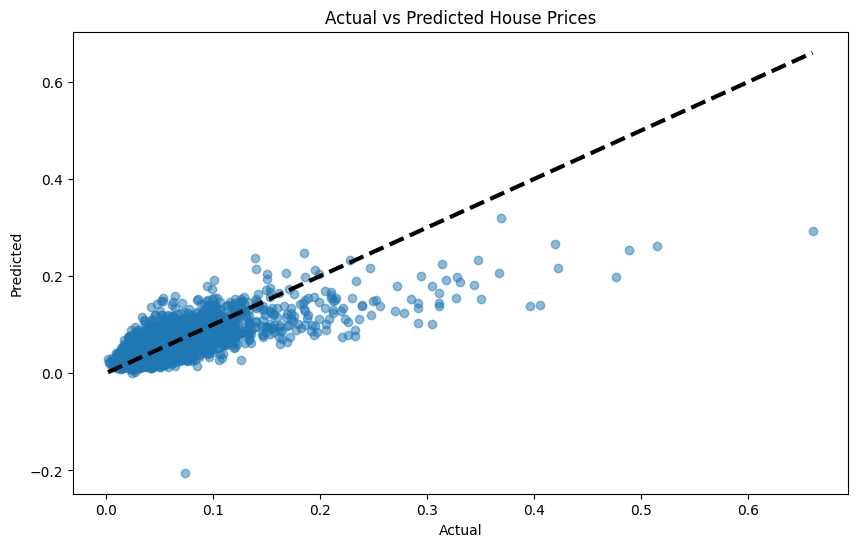

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()